<ipython-input-11-74b97d698226>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhood_counts = neighborhood_counts.append({'neighborhood': neighborhood, 'count': 1}, ignore_index=True)
<ipython-input-11-74b97d698226>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhood_counts = neighborhood_counts.append({'neighborhood': neighborhood, 'count': 1}, ignore_index=True)
<ipython-input-11-74b97d698226>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhood_counts = neighborhood_counts.append({'neighborhood': neighborhood, 'count': 1}, ignore_index=True)
<ipython-input-11-74b97d698226>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

                 neighborhood count
2   CENTRAL BUSINESS DISTRICT   110
6             SOUTHSIDE FLATS    73
5               NORTH OAKLAND    72
3                  BLOOMFIELD    52
7                   SHADYSIDE    45
10               EAST LIBERTY    42
21             STRIP DISTRICT    33
9                       BLUFF    32
14        SQUIRREL HILL SOUTH    30
4             CENTRAL OAKLAND    30


<ipython-input-11-74b97d698226>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhood_counts = neighborhood_counts.append({'neighborhood': right_hood, 'count': 1}, ignore_index=True)


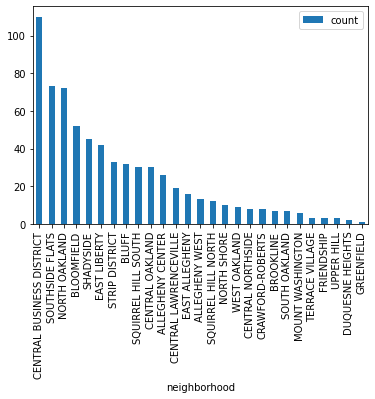

In [11]:
#import the pandas library so we can use it to interpret our data
import pandas as pd

#load all the data from the csv file into a dataframe
df = pd.read_csv('PittsburghMeteredStreets.csv')

#create a new dataframe to store the counts for each neighborhood
neighborhood_counts = pd.DataFrame(columns=['neighborhood', 'count'])

#populate new dataframe
#if a street runs between two different neighborhoods then it counts for both
for index, row in df.iterrows():
    #get the neighborhood in the hood_left column
    left_hood = row['hood_left']
    #get the neighborhood in the hood_right column
    right_hood = row['hood_right']
    #if both neighborhoods are the same, only increment the count for one of them
    if left_hood == right_hood:
        neighborhood = left_hood
        #check if the neighborhood is already in the neighborhood_counts dataframe
        if neighborhood in neighborhood_counts['neighborhood'].values:
            neighborhood_counts.loc[neighborhood_counts['neighborhood'] == neighborhood, 'count'] += 1
        else:
            neighborhood_counts = neighborhood_counts.append({'neighborhood': neighborhood, 'count': 1}, ignore_index=True)
    else:
        #increment the count for the neighborhood in the hood_left column
        if left_hood in neighborhood_counts['neighborhood'].values:
            neighborhood_counts.loc[neighborhood_counts['neighborhood'] == left_hood, 'count'] += 1
        else:
            neighborhood_counts = neighborhood_counts.append({'neighborhood': left_hood, 'count': 1}, ignore_index=True)
        #increment the count for the neighborhood in the hood_right column
        if right_hood in neighborhood_counts['neighborhood'].values:
            neighborhood_counts.loc[neighborhood_counts['neighborhood'] == right_hood, 'count'] += 1
        else:
            neighborhood_counts = neighborhood_counts.append({'neighborhood': right_hood, 'count': 1}, ignore_index=True)

#sort the neighborhoods by number of streets
sorted_neighborhoods = neighborhood_counts.sort_values(by='count', ascending=False)

#drop the row for the streets with no neighborhood information
sorted_neighborhoods = sorted_neighborhoods.drop(sorted_neighborhoods[sorted_neighborhoods['neighborhood'] == ''].index)

#print the top 10 neighborhoods by number of streets
print(sorted_neighborhoods.head(10))

#plot the bar chart
sorted_neighborhoods.plot(kind='bar', x='neighborhood', y='count')
